In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# PCA 主成分分析

In [48]:
from sklearn.datasets import load_iris

In [49]:
iris = load_iris()

In [50]:
x = iris.data
y = iris.target

In [51]:
from sklearn.decomposition import PCA

## step 1. 開PCA機

In [52]:
pca = PCA(n_components = 2)  #指定壓到二維（原本有四維）

## step 2. 訓練

In [53]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## step 3 預測

In [54]:
x [87] # 確認原本真的有四個維度

array([6.3, 2.3, 4.4, 1.3])

In [55]:
X = pca.transform(x) #開始轉換

In [56]:
X[87] #轉換後真的只有兩維

array([ 0.81509524, -0.37203706])

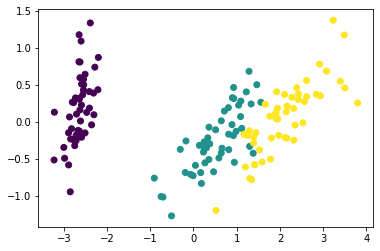

In [57]:
plt.scatter(X[:,0], X[:, 1], c = y) # x所有列第0行，y放所有列第一行，類別就在y中所以放y

# 準備訓練/測試資料

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                   random_state = 0) # 輸入是X，因為前面轉換過了。y 是y

## step 1: 開SVC開函數機

In [60]:
from sklearn.svm import SVC

In [61]:
clf = SVC(gamma = 'auto') # gamma 是在選要以精準度為優先還是大概分就好

## step2 訓練

In [62]:
clf.fit(x_train, y_train) # 指定輸入是x_train，輸出是y_train

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## step 3 預測

In [63]:
y_predict = clf.predict (x_test)

In [64]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

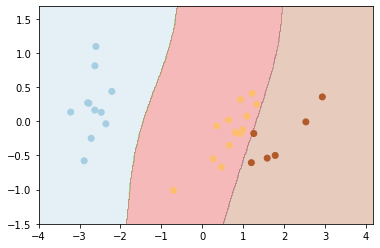

In [65]:
x0 = np.arange(-4, 4.2, 0.02) #數字是剛剛畫圖時發現的範圍
y0 = np.arange(-1.5, 1.7, 0.02)

xm, ym = np.meshgrid(x0, y0) # 經過meshgrid的取個名字叫xm, ym
P = np.c_[xm.ravel(), ym.ravel()] # （np_c）指定一個x座標對一個y座標
z = clf.predict(P)
Z = z.reshape(xm.shape) #指定Z要跟xm長相一樣
plt.contourf(xm, ym, Z, alpha = 0.3, cmap = 'Paired')
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test, cmap = 'Paired')

# K-Means 自動分類

In [66]:
x = np.random.rand(100,2) # 自己產出數值 100 個亂數，有二維

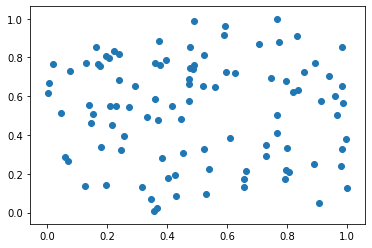

In [67]:
plt.scatter(x[:, 0], x[:, 1])

### step 1. 開函數學習機

In [69]:
from sklearn.cluster import KMeans

In [70]:
clf = KMeans(n_clusters=3) # 要求分三類

### step 2 學習

In [73]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### step 3 預測

In [74]:
clf.predict(x)

array([0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 2,
       2, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1, 2, 1,
       1, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1,
       1, 2, 2, 2, 0, 2, 1, 2, 1, 1, 2, 1], dtype=int32)

In [75]:
clf.labels_ 

array([0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 2,
       2, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1, 2, 1,
       1, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1,
       1, 2, 2, 2, 0, 2, 1, 2, 1, 1, 2, 1], dtype=int32)

In [76]:
clf.predict(x)-clf.labels_ #發現預測跟labels一模一樣

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

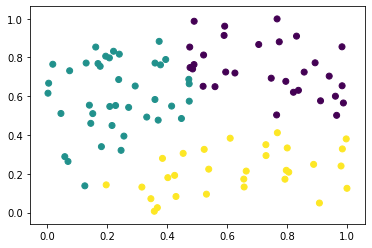

In [77]:
plt.scatter(x[:,0], x[:,1], c = clf.labels_)

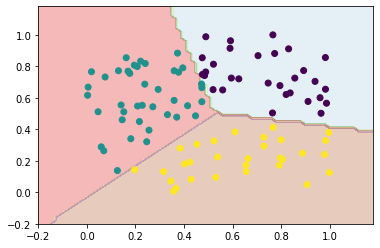

In [80]:
x0 = y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0, y0) 

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha = 0.3, cmap='Paired')
plt.scatter(x[:, 0], x[:,1], c=clf.labels_)

## make_blobs 生出一個比較像樣的資料的工具（比較像真實世界）

In [81]:
from sklearn.datasets.samples_generator import make_blobs

In [83]:
x, y = make_blobs(n_samples = 500, centers = 3, 
                 n_features = 2,
                 random_state = 0)
# 要500個點，分三類，兩維

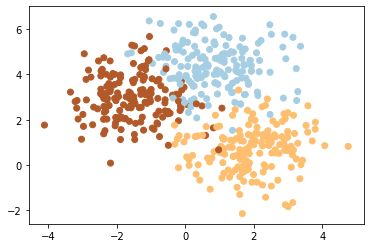

In [84]:
plt.scatter(x[:,0], x[:,1], c = y, cmap = 'Paired') # 這是用make_blobs生出的資料圖

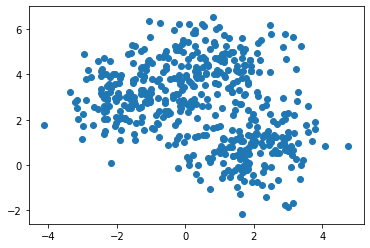

In [85]:
plt.scatter(x[:,0], x[:,1])

## step 1. 開函數學習機，用K-Means來試圖分make_blobs產生的資料

In [87]:
clf = KMeans(n_clusters=3)

## step 2. 訓練

In [88]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## step3. 預測（但用KMeans 就可以直接畫）

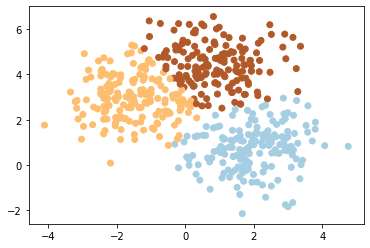

In [90]:
plt.scatter(x[:,0], x[:,1], c = clf.labels_, cmap = 'Paired')

# MeanShift 不需要告訴他要分幾類

## step 1. 打開函數學習機 

In [91]:
from sklearn.cluster import MeanShift

In [109]:
clf = MeanShift(bandwidth = 0.9) ## bandwidth 告訴他想分群要分多細

## step 2. 訓練

In [106]:
clf.fit(x)

MeanShift(bandwidth=0.9, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

## step 3. 預測

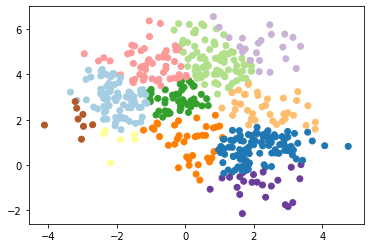

In [107]:
plt.scatter(x[:,0], x[:,1], c = clf.labels_, cmap = 'Paired')

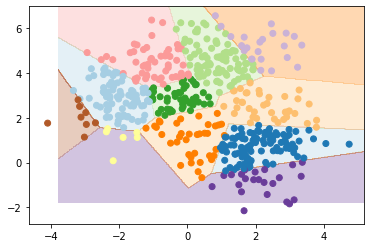

In [108]:
x0 = np.arange(-3.8, 5.2, 0.02)
y0 = np.arange(-1.8, 7, 0.02)

xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)

plt.contourf(xm, ym, Z, alpha = 0.3, cmap = 'Paired')
plt.scatter(x[:, 0], x[:, 1], c = clf.labels_, cmap = 'Paired')

## cross_val_score  去評分哪種方式最好

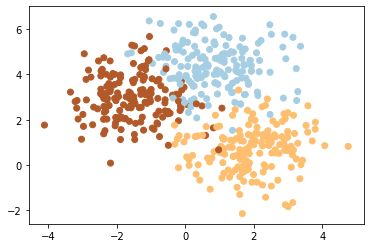

In [110]:
plt.scatter(x[:,0], x[:, 1], c = y, cmap = 'Paired')

In [111]:
from sklearn.model_selection import cross_val_score

# SVC

In [112]:
from sklearn.svm import SVC

In [113]:
clf = SVC(gamma = 'auto')

In [114]:
scores = cross_val_score(clf, x, y, cv = 5)

In [115]:
scores

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])

In [116]:
scores.max()

0.98989898989899

≈

In [117]:
scores.mean()

0.9420106716554008

In [118]:
scores.std()

0.0266137011480394

# Decision Tree

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
clf = DecisionTreeClassifier()

In [121]:
scores = cross_val_score(clf, x, y, cv = 5)

In [122]:
scores

array([0.91176471, 0.88118812, 0.94949495, 0.90909091, 0.88888889])

In [123]:
scores.max()

0.9494949494949495

In [124]:
scores.mean()

0.9080855144337964

## random forest  整體學習的一種方法

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
clf = RandomForestClassifier(n_estimators=100)

In [37]:
scores = cross_val_score(clf, x, y, cv = 5)

In [38]:
scores

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [39]:
scores.max()

1.0

In [40]:
scores.mean()

0.96